In [23]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/amostra_nba_2.xlsx')

In [27]:
df

,Player,Pos_y,GP,Min,PTS,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Temporadas,Altura,Peso
0,Eldridge Recasner,PG,38.333333,16.658261,5.608696,0.430368,1.526087,0.403061,0.892308,1.686957,1.052174,0.447826,0.030435,1.269565,10.308696,6,1.91,86.18
1,Antoine Walker,SF,74.416667,35.324412,17.524076,0.413704,3.549832,0.325047,0.633061,7.716685,2.804031,1.215006,0.525196,2.817469,34.525196,12,2.06,101.60
2,David Wesley,PG,68.727273,34.725132,13.587302,0.422500,4.470899,0.361653,0.790552,2.619048,1.997354,1.403439,0.181217,2.529101,26.194444,11,1.83,86.18
3,Rick Fox,SF,70.250000,27.374199,9.574733,0.439983,2.996441,0.348321,0.772257,3.875445,1.706406,1.035587,0.341637,3.003559,21.144128,8,2.01,104.33
4,Anthony Mason,PF,77.166667,38.742981,12.345572,0.498698,4.159827,0.200000,0.728066,9.041037,1.855292,0.835853,0.300216,2.524838,30.987041,6,2.03,113.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Yuta Watanabe,SF,31.000000,12.334194,3.696774,0.396917,0.574194,0.334532,0.653846,2.296774,0.419355,0.374194,0.283871,0.993548,8.870968,5,2.06,97.52
347,Donte DiVincenzo,SG,56.400000,25.220567,10.879433,0.426077,2.560284,0.370857,0.762295,4.361702,1.365248,1.152482,0.301418,1.765957,22.953901,5,1.93,92.08
348,Mikal Bridges,SF,78.200000,32.008951,13.015345,0.484488,2.398977,0.373117,0.824852,4.051151,1.104859,1.237852,0.544757,1.907928,25.718670,5,1.98,94.80
349,Marvin Bagley III,PF,43.200000,24.132870,13.143519,0.516464,0.953704,0.297688,0.681957,7.111111,1.263889,0.472222,0.662037,2.023148,25.245370,5,2.08,106.59


### Box Plot - Possiveis outliers

<Axes: xlabel='Pos_y', ylabel='Altura'>

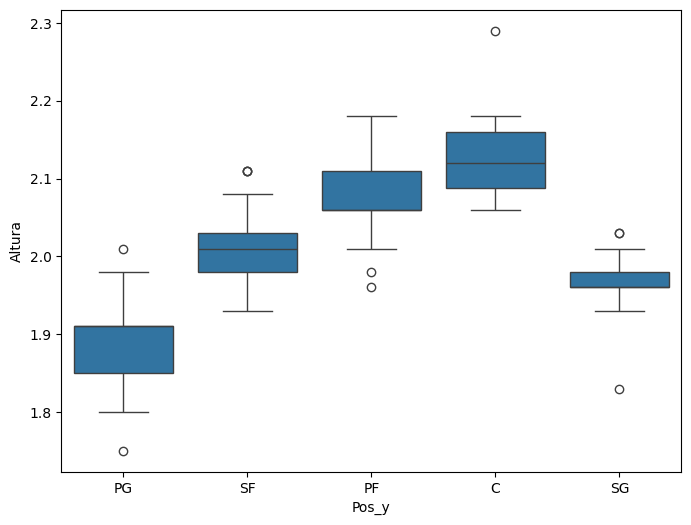

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Pos_y', y='Altura')

### Avaliação da normalidade multivariada

### distancia mahalanobis

In [29]:
from scipy.spatial import distance
import numpy as np

df_teste_mult = df[['Player', 'Min',	'PTS',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']]
df_valores_i = df_teste_mult[['Min',	'PTS',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']]

#vetor media amostral
media = list(df_valores_i.mean().to_list())

#matriz covariancia amostra
matriz = df_valores_i.cov()
matriz_cov = []
for col in list(matriz.columns):
  lista = []
  for col_i in list(matriz.columns):
    lista.append(matriz[col][col_i])
  matriz_cov.append(lista)

#matriz covariancia amostra inversa
cov_inv = np.linalg.inv(matriz_cov)

# Calculando a distância de Mahalanobis para cada ponto
mahal_distances = []
for i in range(len(df_valores_i)):
    x_i = list(df_valores_i.iloc[i].values)
    dist = distance.mahalanobis(x_i, media, cov_inv)
    mahal_distances.append(dist)



### quantil amostral

In [30]:
def quantil(n,p = 0.5):
  lista_qt = []
  for i in range(n):
    lista_qt.append(((i+1)-p)/n)
  return lista_qt

def quantil_i(n,i,p = 0.5):
  return ((i-p)/n)

In [31]:
import scipy.stats as stats

qntil = quantil(len(df_valores_i))

mahal_distances
# Definir os graus de liberdade e o percentil
graus_de_liberdade = 13

# Calcular o valor da distribuição qui-quadrado inversa para o percentil
lista_quantil_inversa =[]
for i in range(len(df_valores_i)):
  valor_qui_quadrado = stats.chi2.ppf(quantil_i(len(mahal_distances),i+1), graus_de_liberdade)
  lista_quantil_inversa.append(valor_qui_quadrado)


In [32]:
infos = { 'mahal_distances' : mahal_distances,
         'quantil' : qntil,
          'Q' : lista_quantil_inversa
        }
df_analise = pd.DataFrame(infos)
df_analise.sort_values(by = 'mahal_distances')

,mahal_distances,quantil,Q
190,1.638675,0.542735,12.878179
65,1.737621,0.186610,8.445856
142,1.794525,0.405983,11.200599
280,1.841632,0.799145,16.966181
77,1.842435,0.220798,8.916740
...,...,...,...
309,6.564771,0.881766,19.159739
273,6.775758,0.779202,16.548025
68,6.788014,0.195157,8.566443
33,6.953998,0.095442,6.952980


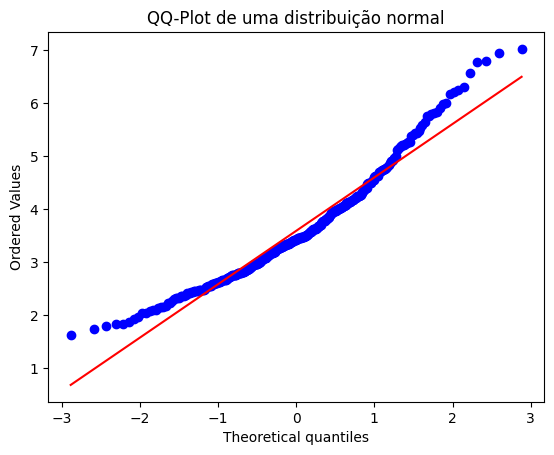

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Criar o QQ-plot
stats.probplot(df_analise['mahal_distances'], dist="norm", plot=plt)

# Exibir o gráfico
plt.title("QQ-Plot de uma distribuição normal")
plt.show()


### Biplot



1.   Fazer uma visão posição
2.   contruir um biplot com a posição e os vetores variaveis



### Por Posição

In [35]:
#agrupando por posição definida pela NBA
df_posicao = df[df['Pos_y'].isin(['PF','PG','SF','SG','C'])][['Pos_y','Min',	'PTS',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']]
df_stat = df_posicao.groupby('Pos_y').mean()

for col in list(df_stat.columns):
  media = df_stat[col].mean()
  desvp = df_stat[col].std()
  for index,row in df_stat.iterrows():
    pdz = (row[col] - media)/desvp
    df_stat[col][index] = pdz
df_stat

<ipython-input-35-3303ae86d151>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_stat[col][index] = pdz


,Min,PTS,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
Pos_y,,,,,,,,,,,,,,
C,0.131618,0.202876,1.480910,-0.757829,-1.417526,-1.408354,1.497407,0.444114,-0.928838,1.666419,1.477318,1.255221,1.238488,1.397869
PF,-0.844971,-0.651165,0.553396,-0.841222,-0.689201,-0.503873,0.470646,-0.993423,-1.096552,0.115542,0.469738,-0.557776,0.616933,0.601875
PG,-0.531389,-0.690176,-0.947222,1.359806,0.616848,0.738780,-1.038429,0.314352,0.661464,-0.878297,-1.059622,-0.737070,-1.339681,-1.105233
SF,-0.429208,-0.528590,-0.464318,-0.528586,0.632577,0.072735,-0.351170,-1.042145,0.149444,-0.329385,-0.644101,-0.865978,0.023024,-0.271058
SG,1.673949,1.667056,-0.622765,0.767831,0.857302,1.100711,-0.578454,1.277102,1.214482,-0.574279,-0.243333,0.905603,-0.538764,-0.623454


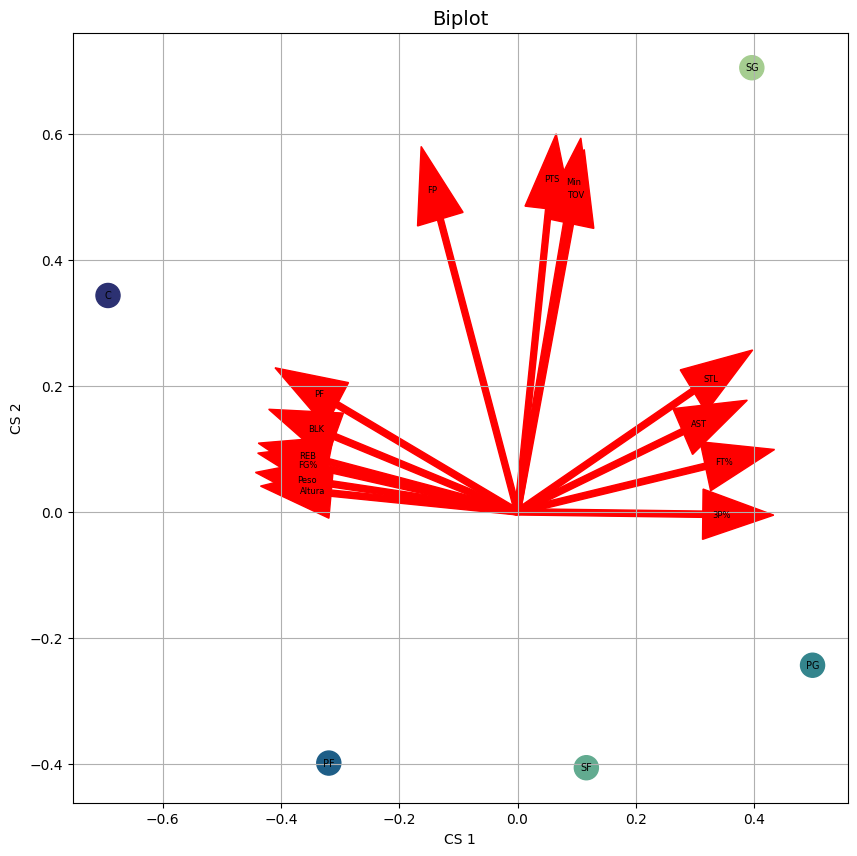

In [94]:
# Realizando a decomposição em valores singulares (SVD)
U, sigma, VT = np.linalg.svd(df_stat, full_matrices=False)

#definindo os valores singulares (2d)
U2 = U[:, :2]
VT2 = VT[:2, :]

# Plotando o biplot
plt.figure(figsize=(10, 10))

# Plotando as observações (linhas de U nas duas primeiras componentes)
plt.scatter(U2[:, 0], U2[:, 1], c=np.arange(len(df_stat)), cmap='crest_r', s=300, label='Observações')

# Adicionando vetores para representar as variáveis originais
for i in range(df_stat.shape[1]):
    plt.arrow(0, 0, VT2[0, i], VT2[1, i], color='r', alpha=1, width=0.01, head_width=0.08)
    plt.text(VT2[0, i] * 1.1, VT2[1, i] * 1.1, df_stat.columns[i], color='black', ha='center', va='center', fontsize=6)

# Adicionando nome nas posições
for i, label in enumerate(df_stat.index):
    plt.text(U2[i, 0], U2[i, 1], label, color='black',  ha='center', va='center', fontsize=7)

plt.title('Biplot', fontsize=14)
plt.xlabel('CS 1')
plt.ylabel('CS 2')
plt.grid(True)
plt.show()
